En este trabajo se realizará un análisis estadístico de la base de datos de nacimientos en Colombia en el año 2022, proporcionada por el Departamento Administrativo Nacional de Estadística (DANE). La base de datos, nac2022.csv contiene información detallada proveniente de los certificados de nacido vivo, esto permite explorar diversas variables relevantes para la comprensión de los patrones demográficos relacionados con la salud en el país.

Este trabajo trata de responder tres preguntas acerca de los datos obtenidos por el DANE. Estas son las preguntas:
1. ¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (EDAD_PADRE)?  
2. ¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente (N_EMB)?   
3. ¿Están correlacionadas y qué grado de correlación tienen ambas variables?

In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau
import scipy.stats as stats
import math

In [3]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving nac2022.csv to nac2022.csv


In [21]:
io_csv = io.BytesIO(uploaded['nac2022.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

<ipython-input-21-ca237db7b685>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
8,638,1,1,NaN,1,4,4,2022,12,1,...,2,12/10/2015,2,2,2.0,29,3,8,1.0,1
11,1,1,1,NaN,1,6,5,2022,12,1,...,2,12/09/2012,2,1,1.0,24,4,11,1.0,1
27,1,1,1,NaN,2,6,5,2022,12,1,...,4,14/03/2019,4,2,2.0,25,3,9,1.0,1


In [22]:
tabla1 = tabla[["EDAD_PADRE", "N_EMB"]]
tabla1.head(4)

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4
8,29,4


In [38]:
df2 = tabla1[(tabla1["EDAD_PADRE"] < 200) & (tabla1["N_EMB"] != 99)]
df2.head(4)

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4
8,29,4


In [39]:
df2 = df2.copy()
df2['N_EMB'] = pd.to_numeric(df2['N_EMB'], errors='coerce')

In [66]:
df2.EDAD_PADRE.head(3)
df2.EDAD_PADRE = df2.EDAD_PADRE.astype(str)
df2.EDAD_PADRE.head(3)

,EDAD_PADRE
COD_DPTO,
8,29
11,24
27,25


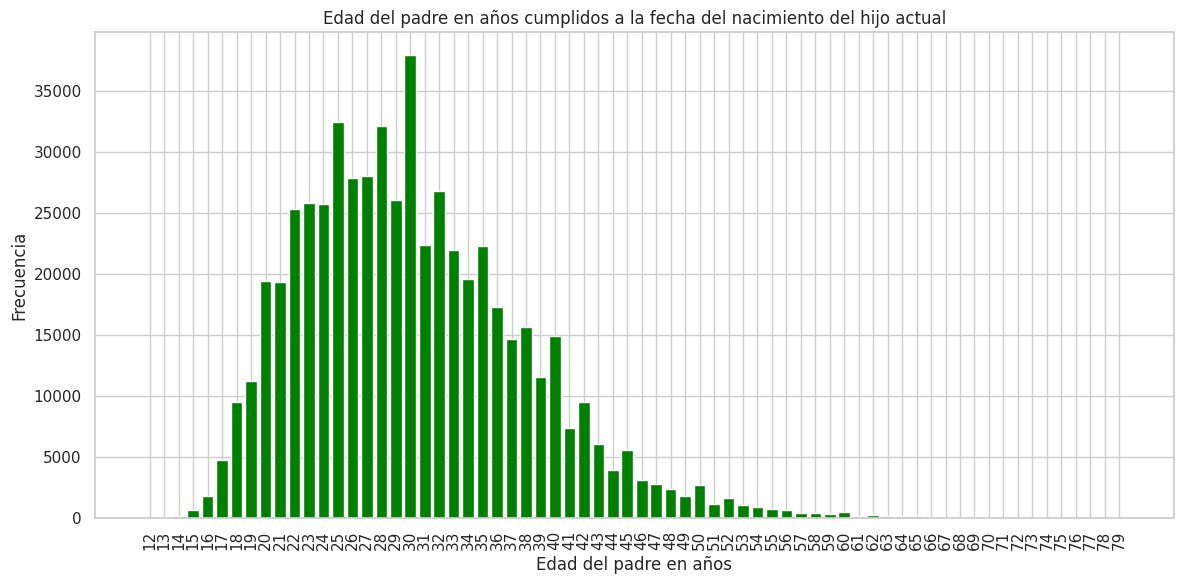

In [67]:
edad_counts = df2.EDAD_PADRE.value_counts().sort_index()

x_values = edad_counts.index
y_values = edad_counts.values

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="green")
plt.title('Edad del padre en años cumplidos a la fecha del nacimiento del hijo actual')

plt.xlabel('Edad del padre en años')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

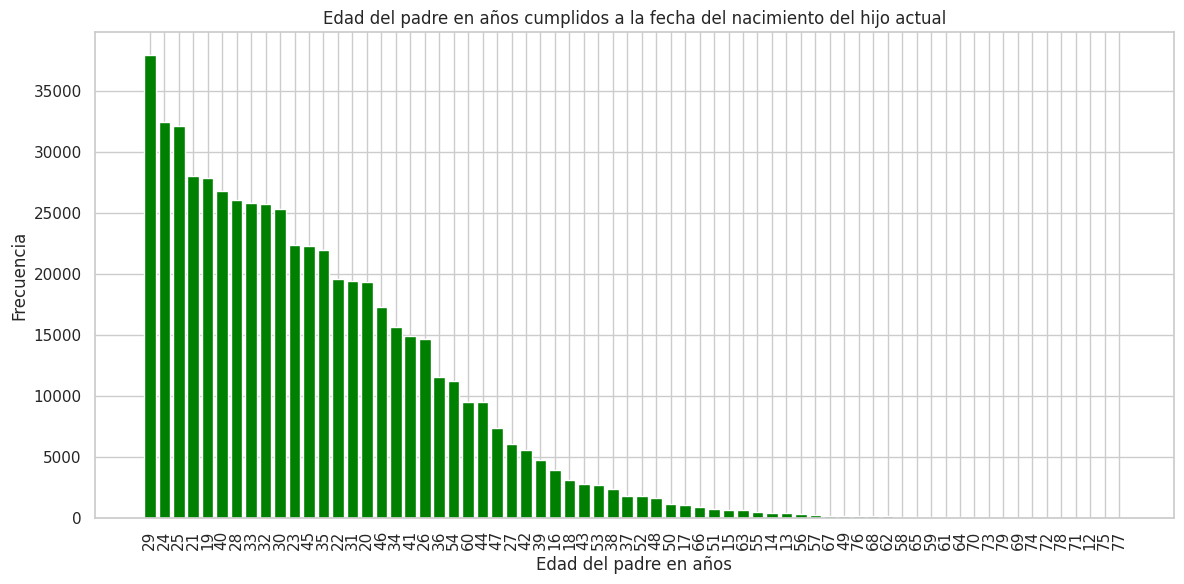

In [68]:
x_values = df2.EDAD_PADRE.unique()
y_values = df2.EDAD_PADRE.value_counts().tolist()
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color = "green")
plt.title('Edad del padre en años cumplidos a la fecha del nacimiento del hijo actual')
ax = plt.subplot()
ax.set_xlabel('Edad del padre en años')
ax.set_ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

En la gráfica anterior se puede observar la frecuencia de los datos correspondientes de la edad del padre en años. Como se puede observar en los datos, la edad con mayor frecuencia es de 29 años, es decir, que esta edad es la moda de los datos.

Además de lo anterior, se puede afirmar que la diferencia entre el dato con mayor frecuencia y el siguiente a este llega a ser de más de 5000 datos, esto quiere decir que la diferencia entre la moda y los demás datos llega a ser muy grande.

Otra observación respecto a la grafica sería como en las edades mayores no se encuentran una gran cantidad de datos, hasta cierto punto que ni siquiera es posible visualizar la respectiva barra de estos datos.

In [69]:
sizes = np.array(y_values)
sizes

array([37873, 32406, 32079, 28010, 27840, 26792, 26002, 25774, 25702,
       25325, 22331, 22256, 21913, 19519, 19359, 19351, 17279, 15638,
       14913, 14637, 11558, 11216,  9501,  9480,  7390,  6016,  5555,
        4702,  3908,  3127,  2746,  2679,  2393,  1803,  1801,  1641,
        1167,  1040,   875,   729,   653,   642,   438,   417,   386,
         276,   238,   137,   133,   117,   117,   105,    47,    44,
          39,    36,    25,    22,    17,    14,    12,     9,     8,
           6,     4,     3,     3,     2])

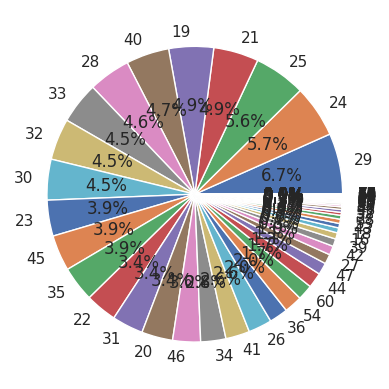

In [70]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [72]:
porcentaje = [(x/len(df2.EDAD_PADRE)*100) for x in y_values]
print(x_values)
print(porcentaje)

['29' '24' '25' '21' '19' '40' '28' '33' '32' '30' '23' '45' '35' '22'
 '31' '20' '46' '34' '41' '26' '36' '54' '60' '44' '47' '27' '42' '39'
 '16' '18' '43' '53' '38' '37' '52' '48' '50' '17' '66' '51' '15' '63'
 '55' '14' '13' '56' '57' '67' '49' '76' '68' '62' '58' '65' '59' '61'
 '64' '70' '73' '79' '69' '74' '72' '78' '71' '12' '75' '77']
[6.664543285305028, 5.702510751817778, 5.644968290056241, 4.928942978411898, 4.899027937129141, 4.714610506162498, 4.575593549613216, 4.5354722001281065, 4.522802300290704, 4.456461296975413, 3.9296046287367408, 3.9164068164061123, 3.8560488213473736, 3.4347746517537256, 3.406619318781719, 3.4052115521331188, 3.0405999901456338, 2.751831856351491, 2.6242530038220866, 2.575685054445375, 2.033870865565324, 1.9736888413376599, 1.6718988660439644, 1.6682034785913888, 1.3004244416445532, 1.0586405197474467, 0.9775179666218529, 0.8274148477148429, 0.6876940078412602, 0.5502607887716532, 0.48321590213206256, 0.4714258564500348, 0.4210981987625731, 0.317

En el anterior diagrama se puede observar el porcentaje correspondiente a cada valor de la edad del padre en años cumplidos a la fecha del nacimiento del hijo actual en Colombia. Se reafirma lo mencionado anteriormente respecto a la edad con mayor frecuencia ya que aproximadamente es 1% mayor a la segunda edad con mayor frecuencia, de la misma manera, se observa como las edades con menor cantidad de datos son menores a 1%.

Respondiendo la pregunta ¿Cómo se comporta la variable "edad del padre en años cumplidos a la fecha del nacimiento de este hijo" (EDAD_PADRE)?, se puede observar que la gráfica presenta una distribución con asimetría hacia la izquierda, ya que, los datos obtenidos se acumulan en la parte izquierda del histograma, además de esto, se observa que la mayoría de los datos se encuentran alrededor de la media y en menor medida alejados de esta, es decir que la grafica tiene unas colas más pesadas.

# ▶ Número de embarazos:

In [73]:
#df2.N_EMB = df2.N_EMB.astype(str)
df2.N_EMB.head(2)

,N_EMB
COD_DPTO,
8,2
11,2


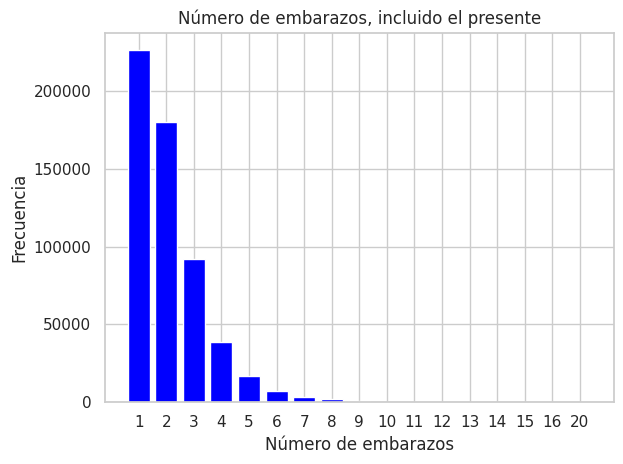

In [74]:
df2 = df2.copy()
df2['N_EMB'] = pd.to_numeric(df2['N_EMB'], errors='coerce')
n_emb_counts = df2['N_EMB'].value_counts().sort_index()

plt.bar(n_emb_counts.index.astype(str), n_emb_counts.values, color="blue")
plt.title('Número de embarazos, incluido el presente')
plt.xlabel('Número de embarazos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [75]:
sizes = np.array(y_values)
sizes

array([37873, 32406, 32079, 28010, 27840, 26792, 26002, 25774, 25702,
       25325, 22331, 22256, 21913, 19519, 19359, 19351, 17279, 15638,
       14913, 14637, 11558, 11216,  9501,  9480,  7390,  6016,  5555,
        4702,  3908,  3127,  2746,  2679,  2393,  1803,  1801,  1641,
        1167,  1040,   875,   729,   653,   642,   438,   417,   386,
         276,   238,   137,   133,   117,   117,   105,    47,    44,
          39,    36,    25,    22,    17,    14,    12,     9,     8,
           6,     4,     3,     3,     2])

En el anterior histograma se muestra la frecuencia de los datos correspondientes del número de embarazos, incluido el presente en Colombia. Se puede observar que el número de embarazos tienen una frecuencia que va en orden con el número mismo de embarazos, esto quiere decir que mientras mayor sea el número de embarazos menor será la frecuencia de este dato.
Además de lo anterior, se puede observar como la mayoría de los datos se encuentran entre los 2 primeros datos, esto es bueno, ya que en este caso principalmente por salud (de la madre) es mejor mientras menor sea el número de embarazos a la edad de esta.

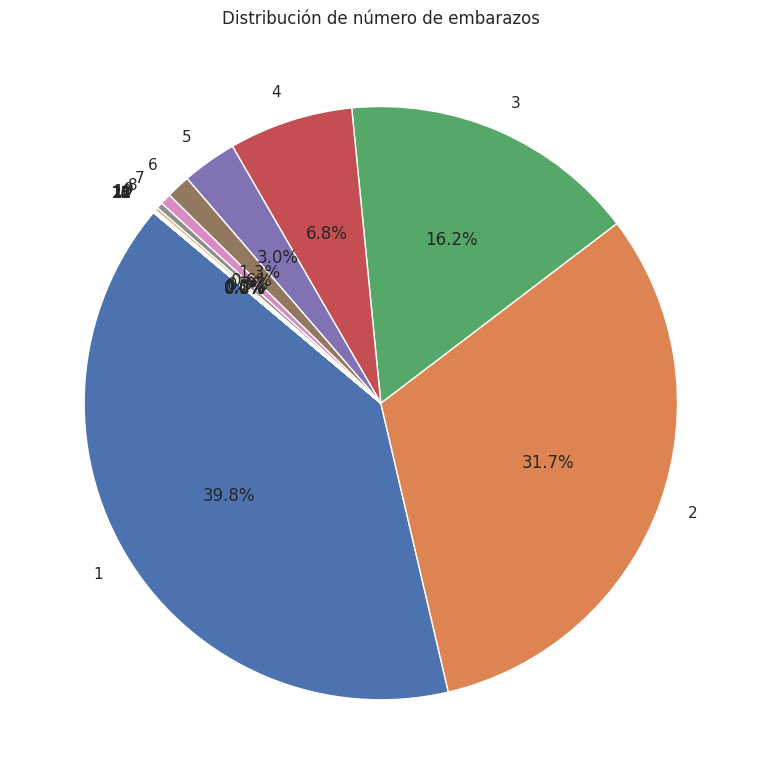

In [76]:
df2 = df2.copy()
df2['N_EMB'] = pd.to_numeric(df2['N_EMB'], errors='coerce')
n_emb_counts = df2['N_EMB'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(n_emb_counts.values, labels=n_emb_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Distribución de número de embarazos')
plt.tight_layout()
plt.show()

In [79]:
len(df2.EDAD_PADRE)

568276

In [80]:
x_values = n_emb_counts.index
y_values = n_emb_counts.values
porcentaje = [(x/len(df2.N_EMB)*100) for x in y_values]
print(x_values.tolist())
print(porcentaje)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20]
[np.float64(39.76536049384454), np.float64(31.700793276506484), np.float64(16.21078490029493), np.float64(6.773293258909403), np.float64(2.9899203907960215), np.float64(1.3025360916174535), np.float64(0.6042838339116908), np.float64(0.33082516242107707), np.float64(0.16928393949418946), np.float64(0.07461163237581739), np.float64(0.04170508696478472), np.float64(0.021820383053305085), np.float64(0.009150483215902132), np.float64(0.004047329114725943), np.float64(0.001055824986450246), np.float64(0.000351941662150082), np.float64(0.000175970831075041)]


La anterior gráfica presenta el porcentaje correspondiente a cada valor del número de embarazos, incluido el presente.Tanto en la gráfica como en el código se confirmar como más de la mitad de los datos se encuentran entre 1 y 2 embarazos. Además, se encuentra una diferencia de casi la mitad entre el porcentaje de 2 embarazos a 3.

Por otra parte, respondiendo la pregunta ¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente (N_EMB)? se puede observar que la gráfica presenta una distribución con asimetría hacia la izquierda, ya que, los datos obtenidos se acumulan en la parte izquierda del histograma, además de esto, de igual manera que para la edad del padre, la mayoría de los datos se encuentran cerca de la media y hay una menor cantidad alejados de la media.




# **Tabla de contingencia**

In [61]:

df2.EDAD_PADRE, df2.N_EMB = df2.EDAD_PADRE.astype(str), df2.N_EMB.astype(str)
df2.head(3)

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4


In [62]:
tabla_cont = pd.crosstab(df2.N_EMB, df2["EDAD_PADRE"])
tabla_cont

EDAD_PADRE,12,13,14,15,16,17,18,19,20,21,...,70,71,72,73,74,75,76,77,78,79
N_EMB,,,,,,,,,,,,,,,,,,,,,
1,3,23,111,609,1677,4220,8035,8789,14065,12901,...,8,1,3,3,3,2,1,0,0,0
10,0,0,0,0,0,1,0,1,1,3,...,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,4,26,89,364,1084,1788,3751,4443,...,11,2,3,1,5,0,3,1,1,1


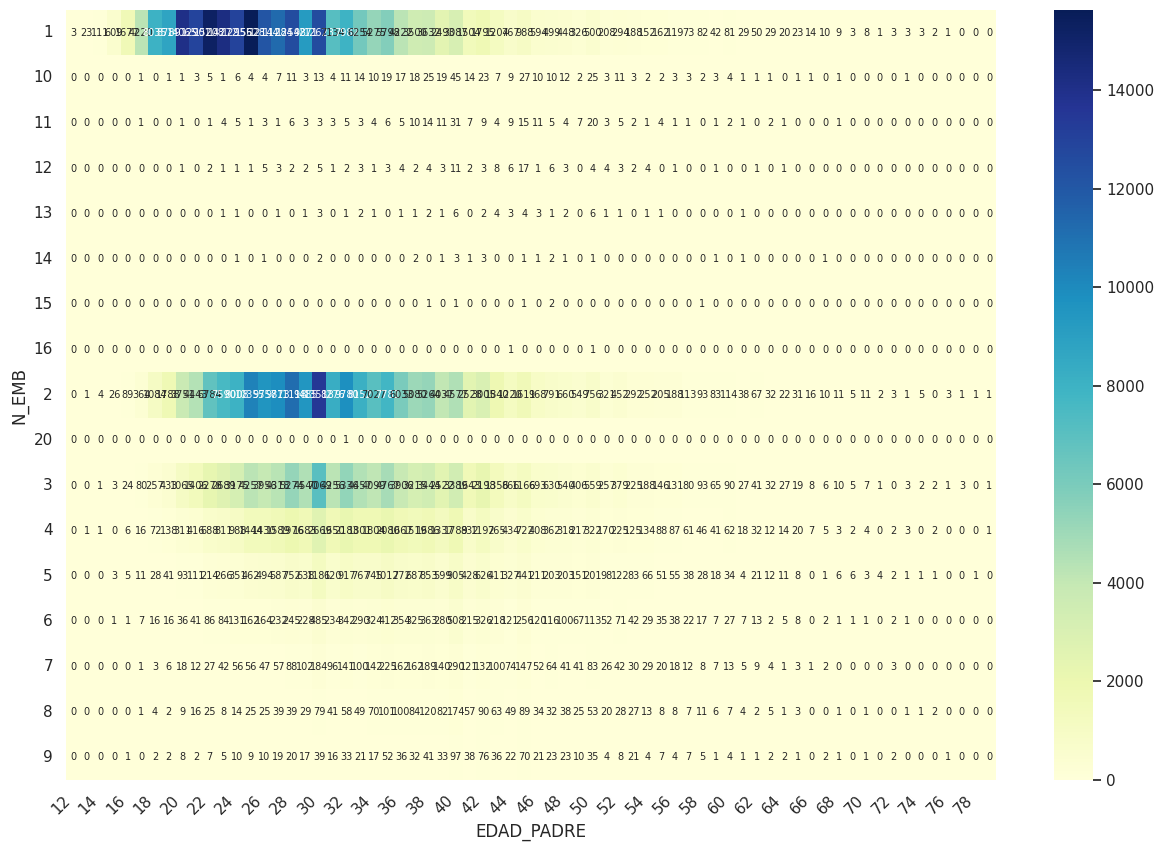

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt='d', cmap='YlGnBu', cbar=True, annot_kws={"size":7})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [65]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 99505.85433471076 y el valor p es d 0.0


In [33]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.N_EMB)))
coeficiente_phi = math.sqrt(chi/len(df2.N_EMB))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.N_EMB)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.38601751402169004, 0.41845104712631587 y 0.41845104712631587


In [34]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.EDAD_PADRE)))
coeficiente_phi = math.sqrt(chi/len(df2.EDAD_PADRE))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.EDAD_PADRE)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.38601751402169004, 0.41845104712631587 y 0.41845104712631587


En conclusión, respondiendo la pregunta: ¿Están correlacionadas y qué grado de correlación tienen ambas variables?, se puede decir que las variables EDAD_PADRE y N_EMB están correlacionadas entre ellas, ya que:
El coeficiente de contingencia indica que hay una relación moderada entre las dos variables.
El coeficiente de Phi indica una relación fuerte entre las dos variables.
El coeficiente V de Cramer indica una relación moderada entre ambas variables.